#Importing

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

#loading the image and the template

We transfer both images to gray scale form.

In [ ]:
img = cv.imread('/content/Greek-ship.jpg', cv.IMREAD_GRAYSCALE)
target = cv.imread('/content/patch.png', cv.IMREAD_GRAYSCALE)

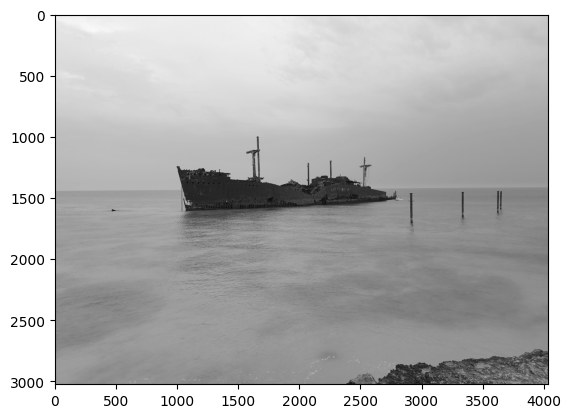

In [ ]:
plt.imshow(img,cmap = 'gray')

After testing all of the 6 different methods ('cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'), i decided to implement 'cv.TM_CCORR' or 'cv.TM_CCORR_NORMED.

#Cross Correlation method

In this method we should calculate a coefficient for each pixel like this:
first we should convolve the kernel (here equals to the template), which mens we should move and multiply(elementwise) template with different parts of the original image and store the sum of each part's multiplication.

Then we should power each element of the template and image by 2 and do the same as before. by dividing these two results we have a coeffiecient for ech pixel. this coefficient shows us how a part is as the same as the template.
For normalized cross correlation we should subtract each part's mean and run the same algorithm.
(Here because my code took a long tome for running i picked the unnormalized method, it's clear that the result could be improved a bit, using the normalized method.)

In [ ]:
def Cross_Correlation(im, temp):
    nom = np.sum(im * temp)
    dinom = np.sqrt( (np.sum(im ** 2))) * np.sqrt(np.sum(temp ** 2))

    return nom / dinom

In [ ]:
def template_matching(img, target):
    h, w = img.shape
    temp_h, temp_w = target.shape
    (max_Y, max_X) = (0, 0)
    MaxValue = 0

    img = np.array(img, dtype="int")
    target = np.array(target, dtype="int")
    coef = np.zeros((h-temp_h, w-temp_w))

    for y in range(0, h-temp_h):
        #print(y)
        for x in range(0, w-temp_w):
            im = img[y : y+temp_h, x : x+temp_w]
            coef[y, x] = Cross_Correlation(im, target)
            #the highest coef in matching:
            if coef[y, x] > MaxValue:
                MaxValue = coef[y, x]
                (max_Y, max_X) = (y, x)

    return (max_X, max_Y, coef)


We run the algorithm and plot the first highest match:

In [ ]:
import cv2
import numpy as np
image = cv2.imread('/content/Greek-ship.jpg', 0)
target = cv2.imread('/content/patch.png', 0)

h_temp, w_temp = target.shape

#result coef matrix, and highest (x, y) match:
x, y, coef = template_matching(image, target)
cv2.rectangle(image, (x, y), (x+ w_temp, y+ h_temp), 0, 3)



In [ ]:
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

#Multi-match finding

Now we should find other matches too. For this purpose we can act like this:

we have the top left coordinates of the highest natch rectangle in the original image. after finding and drawing that we can 0 all the coefficients related to these pixels in coef matrix. now we can find the second highest coefficients and draw the related rectangle.(we assume that the pixel with higher coefficient is in the top left)

p.s = after these steps (and even zeroing some of other pixels around each rectangle the result is still not very good)

In [ ]:
M = coef.copy()

In [ ]:
image = cv2.imread('/content/Greek-ship.jpg', 0)
bias = np.ones((height, width))
for i in range(12):
  Y, X = np.where(M == max(map(max, M)))
  a = X[0]
  b = Y[0]
  print(a,'   ',b)
  cv2.rectangle(image, (a, b), (a + width, b + height), 0, 3)
  p = int(round(height/2))
  q = int(round(width/2))
  M[b-p:b+height, a-q:a+width] = np.zeros_like(M[b-p:b+height, a-q:a+width])



3238     1295
3054     1297
3719     1293
2941     1298
397     2099
253     2100
2815     1327
19     1319
19     1319
19     1319
19     1319
19     1319


In [ ]:
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.